In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
numerical = ['Age']
categorical = ['Cabin','Embarked']
for num in numerical:
    df[num].fillna(df[num].median(),inplace=True)

for cat in categorical:
    df[cat].fillna(df[cat].value_counts().index[0],inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [5]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
numerical = ['Age','Fare']
categorical = ['Cabin']
for num in numerical:
    test[num].fillna(test[num].median(),inplace=True)

for cat in categorical:
    test[cat].fillna(test[cat].value_counts().index[0],inplace=True)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

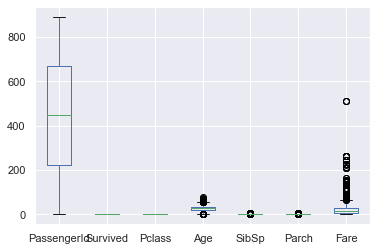

In [8]:
df.plot(kind='box')
plt.show()

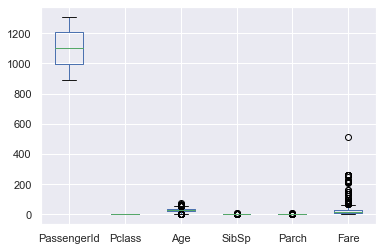

In [10]:
test.plot(kind='box')
plt.show()

In [9]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [12]:
num_cols = ['Fare','Age']

for col in num_cols:
    indx = detect_outlier(df[col])
    df[col].loc[indx] = df[col].median()
    indx1 = detect_outlier(test[col])
    test[col].loc[indx1] = test[col].median()
    

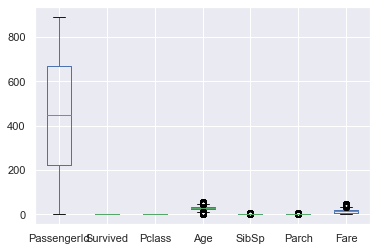

In [13]:
df.plot(kind='box')
plt.show()

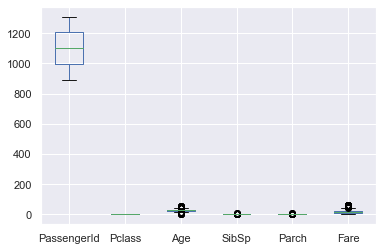

In [14]:
test.plot(kind='box')
plt.show()

In [16]:
train_test_data = [df, test] 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Mme           1
Ms            1
Sir           1
Lady          1
Capt          1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

In [18]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [19]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.4542,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,14.4542,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,0


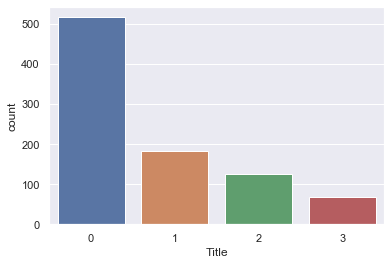

In [21]:
plot = sns.countplot(df["Title"])

In [22]:
del df['Name']
del test['Name']

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,0
1,2,1,1,female,38.0,1,0,PC 17599,14.4542,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,1
3,4,1,1,female,35.0,1,0,113803,14.4542,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,C23 C25 C27,S,0


In [24]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

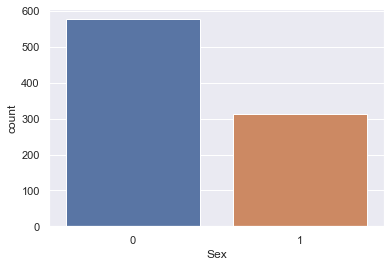

In [25]:
plot = sns.countplot(df["Sex"])

In [26]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [27]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,0
1,2,1,1,1,3.0,1,0,PC 17599,14.4542,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,1
3,4,1,1,1,2.0,1,0,113803,14.4542,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,C23 C25 C27,S,0


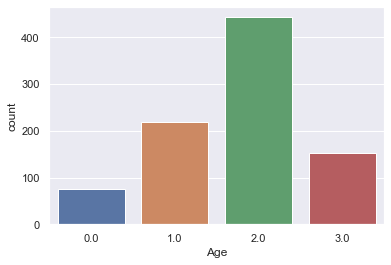

In [28]:
plot = sns.countplot(df["Age"])

In [29]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,C23 C25 C27,0,0
1,2,1,1,1,3.0,1,0,PC 17599,14.4542,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,0,1
3,4,1,1,1,2.0,1,0,113803,14.4542,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,C23 C25 C27,0,0


In [31]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [32]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,C23 C25 C27,0,0
1,2,1,1,1,3.0,1,0,PC 17599,0.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,C23 C25 C27,0,1
3,4,1,1,1,2.0,1,0,113803,0.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,C23 C25 C27,0,0


In [33]:
df.Cabin.value_counts()

C23 C25 C27    691
B96 B98          4
G6               4
E101             3
F2               3
              ... 
C118             1
D50              1
A20              1
E12              1
T                1
Name: Cabin, Length: 147, dtype: int64

In [34]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [35]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [39]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [40]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [42]:
features_drop = ['Ticket', 'SibSp', 'Parch']
df = df.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
df = df.drop(['PassengerId'], axis=1)

In [44]:
train_data = df.drop('Survived', axis=1)
target = df['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [45]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,0.8,0,0,0.4
1,1,1,3.0,0.0,0.8,1,2,0.4
2,3,1,1.0,0.0,0.8,0,1,0.0
3,1,1,2.0,0.0,0.8,0,2,0.4
4,3,0,2.0,0.0,0.8,0,0,0.0


In [47]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [50]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.84269663 0.78651685 0.7752809  0.84269663 0.76404494
 0.82022472 0.80898876 0.75280899 0.82022472]


In [51]:
# decision tree Score
round(np.mean(score)*100, 2)

80.02

In [52]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.80898876 0.78651685 0.80898876 0.84269663 0.78651685
 0.80898876 0.82022472 0.79775281 0.83146067]


In [53]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.81

In [54]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)
test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)


In [56]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('Pred4.csv', index=False)